# Linear Regression

One of the most widely used regression algorithms is the OLS (Ordinary Least Squares) Regression which is a best fit straight line passing through the data points. 

The scope of this project is to build a simple linear regressor which can be used for a set of data points and to figure out the R Squared value which is the co-efficient of determination which is a measure of the goodness of fit of the model. 

### OLS linear regression is essentially Y = mX + b

We first import the required libraries 

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#import seaborn as sns
#sns.set()

style.use('fivethirtyeight')

 We first define a fixed set of points to run the regressor on. Later we will be using randomized points to plot the regression line

In [2]:
# Fixed set of points
xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)


Creating a function that accepts the data points and returns the slope (m) and the Y Intercept (b) of the model

In [4]:
# Programming the best fit slope (m)
# Create the model function.
def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs)*mean(ys)) - mean(xs*ys) ) / # Numerator
        ( (mean(xs)**2) - mean (xs**2)) )        # Denominator
    # Programming the best fit intercept (b) and then the Line
    # b = mean(ys) - m * (mean (xs))
    
    b = mean(ys) - m* (mean(xs))
        
    return m, b

### R Squared : Coefficient of determination
Used to find the accuracy or the goodness of fit of our model to the actual data

In [6]:
def squared_error(ys_orig, ys_line):
    return sum( (ys_line - ys_orig)**2 )

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)        # Computing the Numerator
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)  # Computing the Denominator
    return 1 - (squared_error_regr/squared_error_y_mean)        # R Squared value

### Plotting the curve with the fixed data points

Slope of the line (m): 0.428571428571 
 The y intercept (b): 4.0
Coefficient of Determination (R squared) : 0.584415584416


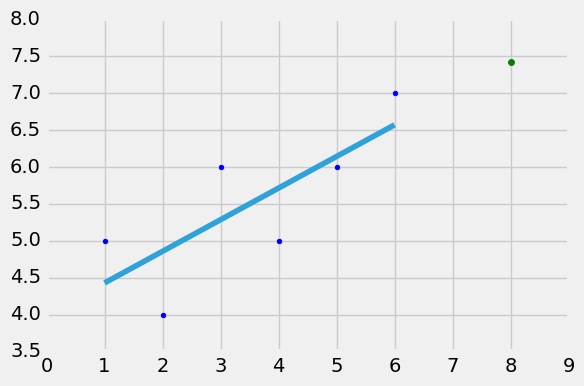

In [14]:

m,b = best_fit_slope_and_intercept(xs,ys)

print("Slope of the line (m):", m, "\n", "The y intercept (b):", b)

regression_line = [(m*x) + b for x in xs] # one line code : Result then the loop

# this is the same as the one below :
# regression_line = []
#for x in xs: 
#    regression_line.append( (m*x) + b)

predict_x = 8 
predict_y = (m*predict_x) + b

r_squared = coefficient_of_determination(ys, regression_line)

print("Coefficient of Determination (R squared) :",r_squared)

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, color = "g")
plt.plot(xs, regression_line)
plt.show()

### Generating a random set of numbers to use for our Linear Regression model

In [15]:
import random

def create_dataset(hm, variance, step=2, correlation=False): # For negative correlation, step can be a negative number.
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == "pos":
            val += step
        elif correlation and correlation == "neg":
            val -= step
            
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)
xs,ys = create_dataset(40, 40, 2, correlation = "pos")


### Fitting the model to the data points

Slope of the line : 1.67195121951 The y intercept: 7.27195121951
Coefficient of Determination (R squared) : 0.400544198307


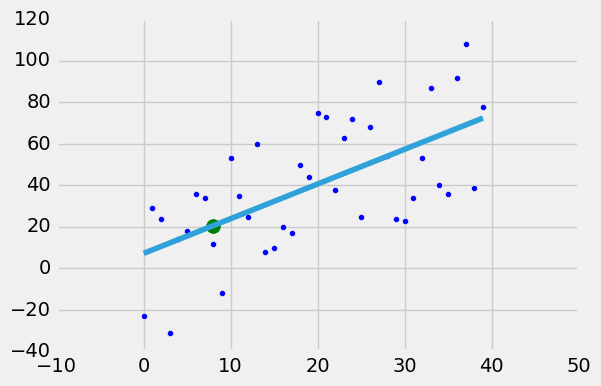

In [6]:
m,b = best_fit_slope_and_intercept(xs,ys)

print("Slope of the line :", m, "The y intercept:", b)

regression_line = [(m*x) + b for x in xs]



predict_x = 8 
predict_y = (m*predict_x) + b

r_squared = coefficient_of_determination(ys, regression_line)

print("Coefficient of Determination (R squared) :",r_squared)

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, s= 100, color = "g")
plt.plot(xs, regression_line)
plt.show()

### The green dot is the predicted value for a data point, x = 8 